In [1]:
#  Numenta Platform for Intelligent Computing (NuPIC)
#  Copyright (C) 2020, Numenta, Inc.  Unless you have an agreement
#  with Numenta, Inc., for a separate license for this software code, the
#  following terms and conditions apply:

#  This program is free software: you can redistribute it and/or modify
#  it under the terms of the GNU Affero Public License version 3 as
#  published by the Free Software Foundation.

#  This program is distributed in the hope that it will be useful,
#  but WITHOUT ANY WARRANTY; without even the implied warranty of
#  MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.
#  See the GNU Affero Public License for more details.

#  You should have received a copy of the GNU Affero Public License
#  along with this program.  If not, see http://www.gnu.org/licenses.

#  http://numenta.org/licenses/

In [73]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from correlation_experiment import SparseCorrExperiment, plot_duty_cycles, plot_entropies

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Activity correlation metrics for networks trained on GSC

This notebook shows a number of examples illustrating how correlated the activations of sparse or dense neural networks are when different GSC class inputs are presented. Namely, this notebook will show the Pearson correlations and normalized dot products of the activations of specific layers. The experiments run in this notebook are:

- Compare sparse CNN with dense CNN activations
- Compare ReLU and k-winner activations with or without sparse weights
- Compare different layer sizes

The purpose of these experiments is to get a handle for how decorrelated sparse network activations are, and to thus inform a plan of attack for exploiting sparsity for continuous learning.

Each experiment will produce 4 plots: 2 for Pearson correlation and 2 for the dot product. Each metric is associated with an "off-diag" plot which shows the mean value of the metric for between-class comparisons, and "diag" which shows the value for within-class comparisons.

Each experiment can be modified in several ways by manipulating the following parameters:

- **sequential:** Boolean. When True, it will train the network 2 random classes at a time. Defaults to False
- **freeze_linear:** Boolean. When True, it will freeze the gradients corresponding to the classes not being trained on in the output layer. Defaults to False.
- **shuffled:** Boolean. When True, will also plot the Pearson correlation and dot product of a shuffled version of the network activations. Defaults to False.

Note that it takes a good amount of time to calculate the Pearson and dot product matrices for large networks. Setting *shuffled=True* will almost double the time it takes to show the results.

The parameters used for initializing and training the models can be found in the "experiments.cfg" file.

In [85]:
config_file = "experiments.cfg"
experiment = SparseCorrExperiment(config_file=config_file)

## Experiment 1: Comparse metrics for dense and sparse CNN

Creating optimizer with learning rate= 0.01
Network trained in 4.183 s
Creating optimizer with learning rate= 0.01
Network trained in 11.223 s


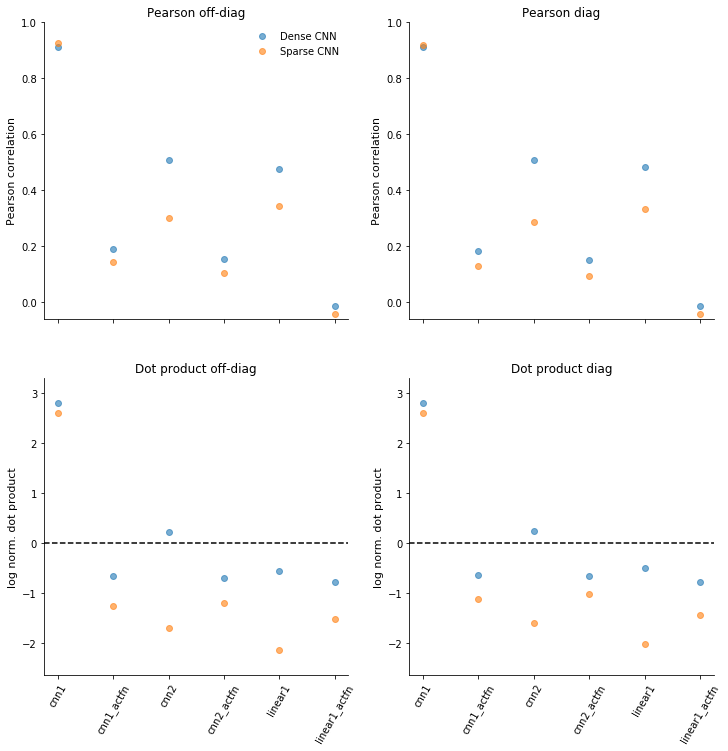

In [86]:
mod_comp_corrs = experiment.model_comparison()

## Experiment 2: Compare ReLU and k-winner activations for dense and sparse weights

Creating optimizer with learning rate= 0.01
Network trained in 10.578 s
Creating optimizer with learning rate= 0.01
Network trained in 7.212 s
Creating optimizer with learning rate= 0.01
Network trained in 11.067 s
Creating optimizer with learning rate= 0.01
Network trained in 7.938 s


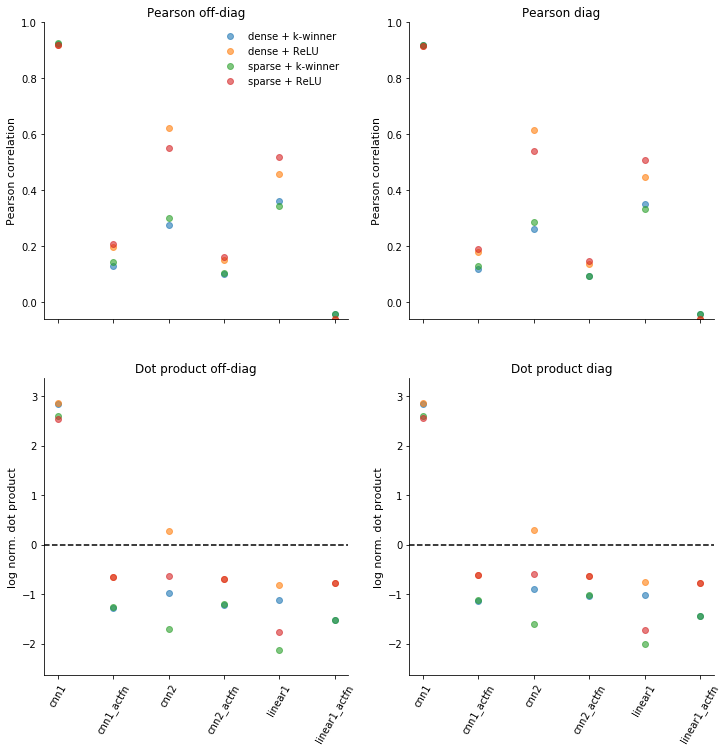

In [78]:
act_fun_corrs = experiment.act_fn_comparison()

## Experiment 3: Compare the metrics for different layer sizes

- You can set the desired layer sizes with the parameter layer_sizes
- You can also add a comparison for with a dense CNN with each layer size by setting compare_models=True

Creating optimizer with learning rate= 0.01
64 layer size network trained in 11.061 s
Creating optimizer with learning rate= 0.01
128 layer size network trained in 17.815 s
Creating optimizer with learning rate= 0.01
256 layer size network trained in 36.58 s


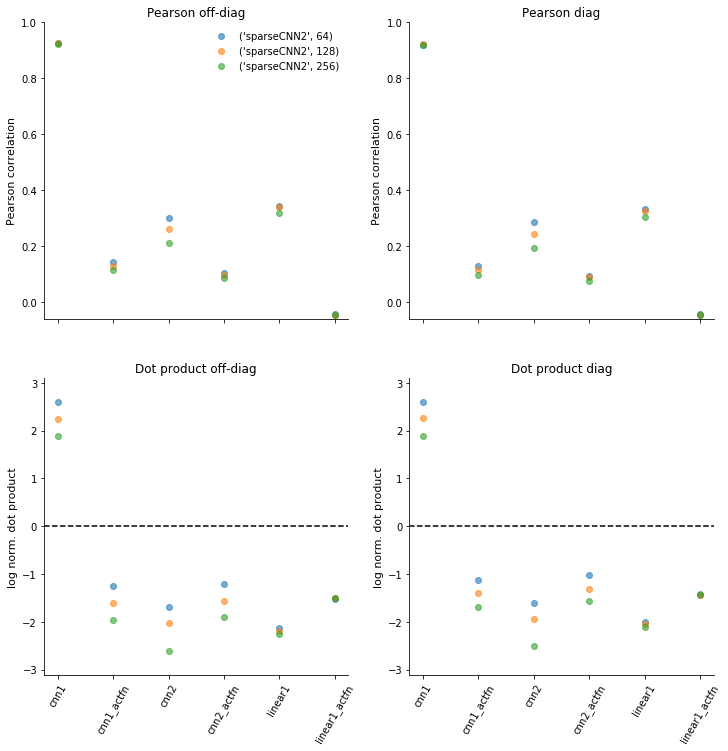

In [79]:
layer_size_corrs = experiment.layer_size_comparison(layer_sizes=[64, 128, 256], compare_models=False)

## Get metrics on shuffled activations:

Creating optimizer with learning rate= 0.01
Network trained in 4.156 s


/home/ec2-user/nta/nupic.research/nupic/research/frameworks/continuous_learning/correlation_metrics.py:110: RuntimeWarning: invalid value encountered in log10
  


Creating optimizer with learning rate= 0.01
Network trained in 11.231 s


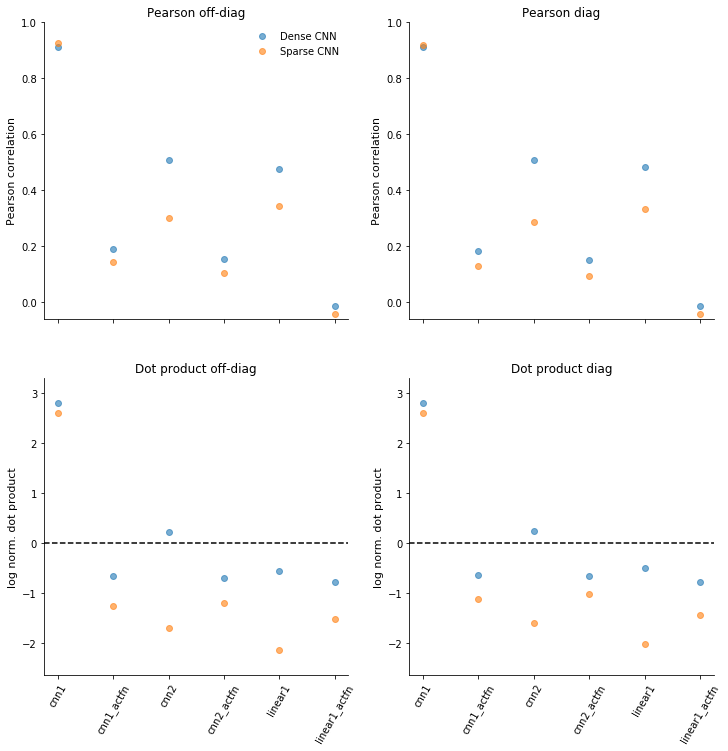

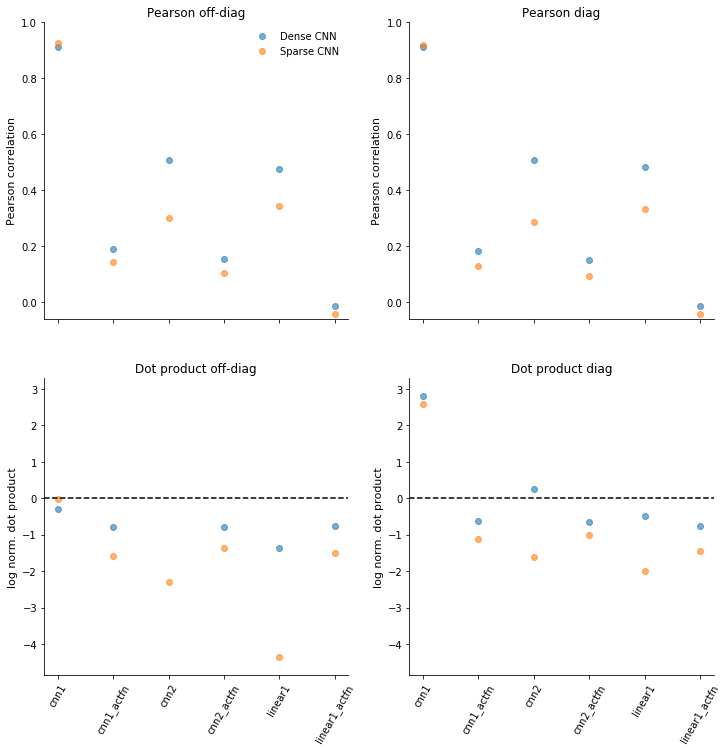

In [80]:
mod_comp_corrs, sh_mod_comp_corrs = experiment.model_comparison(shuffled=True)

## Get metrics on sequentially trained network:

In [ ]:
mod_comp_corrs = experiment.model_comparison(sequential=True)

Creating optimizer with learning rate= 0.01
training on class [4 5]
training on class [3 7]
training on class [8 9]
training on class [2 1]
training on class [ 6 10]
Network trained in 114.74 s
Creating optimizer with learning rate= 0.01
training on class [9 6]
training on class [1 3]
training on class [ 2 10]
training on class [8 4]
training on class [7 5]


### Plot duty cycles and entropy per layer for sequentially trained networks

In [ ]:
# Duty cycles
plot_duty_cycles(experiment)

In [ ]:
# Entropies
plot_entropies(experiment)